<a href="https://colab.research.google.com/github/mertmisirli/1_Tensorflow/blob/main/house_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


In [6]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
# Giriş ve hedef
X = df.drop("medv", axis=1)
y = df["medv"]


In [14]:

# Eğitim/Test böl ve standardize et
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TensorFlow modeli
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'acc'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - acc: 0.0000e+00 - loss: 617.6663 - mae: 22.9232 - val_acc: 0.0000e+00 - val_loss: 513.0189 - val_mae: 21.0817
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.0000e+00 - loss: 551.4498 - mae: 21.4448 - val_acc: 0.0000e+00 - val_loss: 462.2129 - val_mae: 19.9041
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.0000e+00 - loss: 506.0855 - mae: 20.3641 - val_acc: 0.0000e+00 - val_loss: 399.8964 - val_mae: 18.3641
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.0000e+00 - loss: 438.0590 - mae: 18.8195 - val_acc: 0.0000e+00 - val_loss: 322.5990 - val_mae: 16.2718
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.0000e+00 - loss: 331.6493 - mae: 16.0044 - val_acc: 0.0000e+00 - val_loss: 231.4331 - val_mae: 13.4835
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.0000e+00 - loss: 236.7982 - mae: 13.2666 - val_acc: 0.0000e+00 - val_loss: 140.4706 - val_mae: 10.1087
Epoch 7/100
11/11 ━━

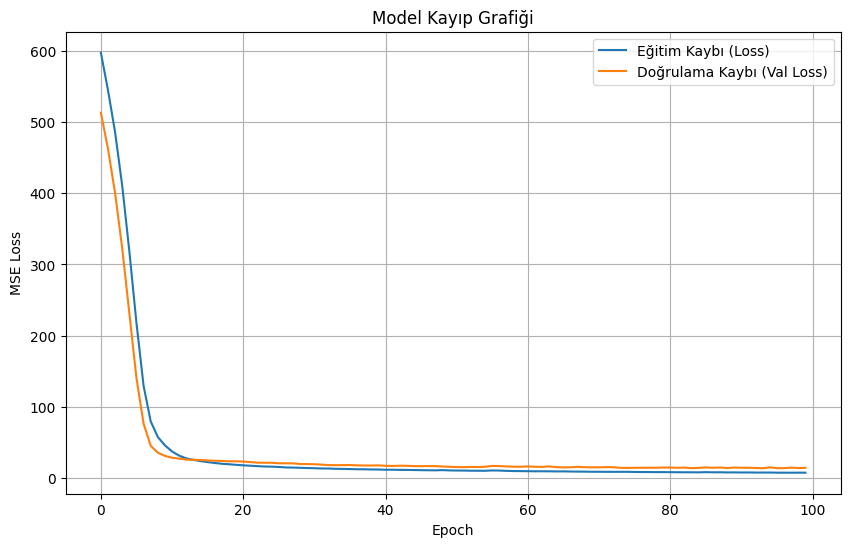

In [16]:
import matplotlib.pyplot as plt

# Kayıpların çizimi
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı (Loss)')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı (Val Loss)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Model Kayıp Grafiği')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Değerlendirme
loss, mae, acc = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Acc: {acc:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.0000e+00 - loss: 9.8801 - mae: 2.3320
Test MAE: 2.49, Acc: 0.00


In [18]:
from keras.datasets import boston_housing

In [19]:
(x_train, y_train),(x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
x_train.shape

(404, 13)

In [21]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
import numpy as np

# X ve y tanımlı olmalı
X = df.drop("medv", axis=1).values
y = df["medv"].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}")

    # Split
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Ölçeklendirme
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Modeli oluştur
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Eğit
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

    # Değerlendir
    loss, mae = model.evaluate(X_val_scaled, y_val, verbose=0)
    print(f"Fold {fold + 1} MAE: {mae:.2f}")
    mae_scores.append(mae)

# Ortalama sonuç
print("\nOrtalama MAE:", np.mean(mae_scores))
print("Standart Sapma:", np.std(mae_scores))


Fold 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 MAE: 2.30
Fold 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 MAE: 1.96
Fold 3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 MAE: 2.87
Fold 4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 MAE: 2.58
Fold 5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 MAE: 2.68

Ortalama MAE: 2.4763692378997804
Standart Sapma: 0.31679325502967687


In [ ]:
# Gerekli kütüphaneler
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt

# Veri setini yükle (Boston kaldırıldı, onun yerine California)
data = fetch_california_housing()
X = data.data
y = data.target

# Veriyi ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçekle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tuning için model tanımı
def build_model(hp):
    model = keras.Sequential()

    # Katman sayısını seç (1 ile 3 arası)
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))

    # Çıkış katmanı
    model.add(layers.Dense(1))

    # Optimizer ve öğrenme oranı seçimi
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")
        ),
        loss='mse',
        metrics=['mae']
    )

    return model

# Tuner oluştur
tuner = kt.Hyperband(
    build_model,
    objective="val_mae",
    max_epochs=30,
    factor=3,
    directory="my_tuner_dir",
    project_name="california_house_price"
)

# Early stopping
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

# Aramayı başlat
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early], verbose=1)

# En iyi hiperparametreleri al
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("En iyi hiperparametreler:")
print(f"- Katman sayısı: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"  - Layer {i} units: {best_hps.get(f'units_{i}')}")
print(f"- Öğrenme oranı: {best_hps.get('learning_rate')}")

# En iyi modeli oluştur ve eğit
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early], verbose=1)

# Test setinde değerlendirme
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest MAE: {test_mae:.2f}")
